In [1]:
import nltk
import textblob
import pandas as pd
import re
import matplotlib.pyplot as plt

from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
#Import Data for analysys
loc =r'C:\Users\Jakub\Desktop\python\Twitter Output\Output.xlsx'
df = pd.read_excel(loc)

In [3]:
df

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,thisisamistak19,2022-01-31 23:40:46,3,Twitter Web App,gene editing and cybernetics present incredibl...
1,an_1llusionist,2022-01-31 23:33:11,1,Twitter for iPhone,@LapisloveLazuli @PunishedAssyo @RepMateo @LRi...
2,an_1llusionist,2022-01-31 23:32:28,1,Twitter for iPhone,@LapisloveLazuli @PunishedAssyo @RepMateo @LRi...
3,Ashvio,2022-01-31 23:26:12,0,Twitter for Android,@LRidgeway14 I think it depends how it's done-...
4,CromwellsD,2022-01-31 23:05:49,0,Twitter Web App,@Novice201 @JamesMelville This.\n\nOpen the fu...
...,...,...,...,...,...
3870,Strategi_Bisnis,2022-01-01 00:17:38,396,Twitter for Android,Tahun 2021 lalu ada 50 buku yg saya baca. Beri...
3871,bap66s,2022-01-01 00:16:28,0,Twitter Web App,https://t.co/gMKr33Qu6V China creating a gener...
3872,Sairakhan1,2022-01-01 00:13:53,0,Twitter for iPhone,First sickle cell patient treated with CRISPR ...
3873,kcmohondro,2022-01-01 00:11:47,2,Twitter for Android,👏👏 First sickle cell patient treated with CRIS...


In [4]:
#function to clear the text
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+', '',text)   # rmv @
    text=re.sub(r'#', '',text)               # rmv #
    text=re.sub(r'RT[\s]+', '',text)         # rmv re-tweets
    text=re.sub(r'https?:\/\/\S+', '',text)  # rmv links
    
    return text

In [5]:
df['Tweet']=df['Tweet'].apply(cleanTxt)

In [6]:
df

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,thisisamistak19,2022-01-31 23:40:46,3,Twitter Web App,gene editing and cybernetics present incredibl...
1,an_1llusionist,2022-01-31 23:33:11,1,Twitter for iPhone,parents that don’t want autistic child...
2,an_1llusionist,2022-01-31 23:32:28,1,Twitter for iPhone,i’m fine if the individual consents to...
3,Ashvio,2022-01-31 23:26:12,0,Twitter for Android,I think it depends how it's done--gene editin...
4,CromwellsD,2022-01-31 23:05:49,0,Twitter Web App,"This.\n\nOpen the full report, pdf. Put mrna..."
...,...,...,...,...,...
3870,Strategi_Bisnis,2022-01-01 00:17:38,396,Twitter for Android,Tahun 2021 lalu ada 50 buku yg saya baca. Beri...
3871,bap66s,2022-01-01 00:16:28,0,Twitter Web App,China creating a generation of ‘super soldier...
3872,Sairakhan1,2022-01-01 00:13:53,0,Twitter for iPhone,First sickle cell patient treated with CRISPR ...
3873,kcmohondro,2022-01-01 00:11:47,2,Twitter for Android,👏👏 First sickle cell patient treated with CRIS...


In [7]:
# Function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to get subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [8]:
df['Subjectivity']=df['Tweet'].apply(getSubjectivity)
df['Polarity']=df['Tweet'].apply(getPolarity)

In [9]:
df1=df.loc[:,['Tweet','Subjectivity','Polarity']]
df1

,Tweet,Subjectivity,Polarity
0,gene editing and cybernetics present incredibl...,0.366319,0.141667
1,parents that don’t want autistic child...,0.200000,-0.200000
2,i’m fine if the individual consents to...,0.466667,0.184343
3,I think it depends how it's done--gene editin...,0.450000,0.258333
4,"This.\n\nOpen the full report, pdf. Put mrna...",0.525000,0.175000
...,...,...,...
3870,Tahun 2021 lalu ada 50 buku yg saya baca. Beri...,0.108333,0.000000
3871,China creating a generation of ‘super soldier...,0.666667,0.333333
3872,First sickle cell patient treated with CRISPR ...,0.333333,0.250000
3873,👏👏 First sickle cell patient treated with CRIS...,0.333333,0.250000


In [10]:
df1 = df1.sort_values(by=['Polarity'], ascending=False)

In [11]:
df1

,Tweet,Subjectivity,Polarity
2891,Bayer and Mammoth Biosciences to collaborate o...,0.75,1.0
1326,Excellent science news for research into GeneE...,1.00,1.0
3806,Nogal een zuur begin v/h nieuwe jaar Jan. Nee...,0.30,1.0
1406,Hello from the 2022 California Weed Science So...,1.00,1.0
1914,Six of the Best Reports from the Front Line of...,0.30,1.0
...,...,...,...
923,Base gene editing technology by Beam Therapeut...,1.00,-0.8
2247,If existing gene editing approaches are like “...,1.00,-0.8
1194,To talk about the health benefits of skipping...,1.00,-1.0
3691,"""CRISPR-based cures will soon help combat all ...",1.00,-1.0


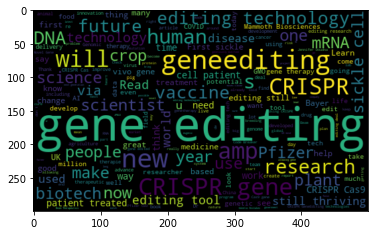

In [12]:
#Plotting

allWords=' '.join( [twts for twts in df['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.show()